In [104]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

from timeit import default_timer as timer
import math
from decimal import Decimal

from IPython.display import display

import scipy.optimize as opt

<h2>Helper functions:</h2>


In [12]:
#A counter class accepts callback function
class Counter:
    def __init__(self,cb):
        self.counter=0
        self.callback=cb

    def __call__(self, *args):
        self.counter+=1
        return self.callback(*args)

    def value(self):
        return self.counter
    
    def reset(self):
        self.counter=0

In [24]:
#Exhaustive search
def exhaustive(f,start,end,prec):
    n=int(np.ceil((end-start)/prec))

    xmin=np.inf
    fmin=np.inf

    #We will count iterations w/o counter class to avoid too many assignments
    numIt=0
    for x in np.linspace(start,end,n):
        numIt+=1

        newF=f(x)
        if(newF<fmin):
            fmin=newF
            xmin=x

    return (xmin,fmin,numIt)
#Dichotomy search
def dichotomy(f,start,end,prec):
    #alg will find local min close to center of section
    delta = prec / 2
    # half of section: (end-st)/2+st=(st+end)/2
    x1 = (start + end - delta ) / 2
    x2 = (start + end + delta ) / 2

    #We will count iterations w/o counter class to avoid too many assignments
    numIt=0
    while abs(start - end) > prec:
        numIt+=1
        if f(x1) <= f(x2):
            end = x2
            #start=start
        else:
            #end=end
            start = x1
        #new xs
        x1 = (start + end - delta ) / 2
        x2 = (start + end + delta ) / 2

    #we could choose just left or right xs too
    xmin = (x1 + x2) /2
    #actually, it is +1 fcalls
    fmin = f(xmin)
    return (xmin,fmin,numIt)

#Golden section search
def goldenSection(f,start,end,prec):
    #alg will find local min close to center of section
    leftConst=(3-5**(1/2))/2
    rightConst=(5**(1/2)-3)/2

    x1 = start + leftConst*(end-start)
    x2 = end + rightConst*(end-start)

    #We will count iterations w/o counter class to avoid too many assignments
    numIt=0
    while abs(start - end) > prec:
        numIt+=1
        if f(x1) <= f(x2):
            end = x2
            #start=start
        else:
            #end=end
            start = x1
        #new xs
        x1 = start + leftConst*(end-start)
        x2 = end + rightConst*(end-start)

    #we could choose just left or right xs too
    xmin = (x1 + x2) /2
    #actually, it is +1 fcalls
    fmin = f(xmin)
    return (xmin,fmin,numIt)

In [31]:
#[name,Counter(lambda),start,end]
funcList=[
    ["x^3",lambda x:x**3,0,1],
    ["|x − 0.2|",lambda x:abs(x-0.2),0,1],
    ["x*sin(1/x)",lambda x:x**3,0.01,1]
]
for i in funcList:
    i[1]=Counter(i[1])

prec=0.001
#[name,lambda]
searchList=[
    ["exhaustive",exhaustive],
    ["dichotomy",dichotomy],
    ["goldenSection",goldenSection]
]


for search in searchList:
    print(search[0]," results:")
    listOfDict=[]
    for f in funcList:
        f[1].reset()

        res=search[1](f[1],f[2],f[3],prec)
        listOfDict.append({
            "function":f[0],
            "xmin":res[0],
            "fmin":res[1],
            "numIt":res[2],
            "fcalls":f[1].value()
        })
    tempdf=pd.DataFrame(listOfDict)
    
    display(tempdf)
    print()


exhaustive  results:


,function,xmin,fmin,numIt,fcalls
0,x^3,0.0000,0.000000,1000,1000
1,|x − 0.2|,0.2002,0.000200,1000,1000
2,x*sin(1/x),0.0100,0.000001,990,990



dichotomy  results:


,function,xmin,fmin,numIt,fcalls
0,x^3,0.000494,1.205674e-10,11,23
1,|x − 0.2|,0.200101,1.011963e-04,11,23
2,x*sin(1/x),0.010492,1.154841e-06,11,23



goldenSection  results:


,function,xmin,fmin,numIt,fcalls
0,x^3,0.000367,4.925680e-11,15,31
1,|x − 0.2|,0.200073,7.331374e-05,15,31
2,x*sin(1/x),0.010363,1.112870e-06,15,31


In [89]:
#random numbers with noise yk=alpha*xk+beta+deltak
np.random.seed(37294)

alpha = np.random.uniform(0,1,1)
beta = np.random.uniform(0,1,1)
print(alpha)
print(beta)
#100 numbers
x = np.linspace(0, 1, 101)
print(x)
#101 samples from the “standard normal” distribution
deltak = np.random.randn(101)
print(deltak)

yk_original=alpha * x + beta
yk = yk_original + deltak

yk

[0.67157667]
[0.03711957]
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
[ 2.68220922e-01 -2.32561959e+00 -1.30485786e+00  1.14545764e+00
  9.06223929e-02  8.19400931e-01 -8.78388120e-01  1.65960783e+00
  1.12823211e+00 -5.73343671e-01 -6.46457126e-01  1.81914175e+00
  3.07024253e-01 -1.72976971e-01 -7.08571162e-01  8.30703107e-01
  9.82253278e-03  1.09661344e+00  4.94279555e-01  6.60296217e-01
  3.42986072e+00 -3.07010740e-01  1.31453374e+00 -8.90443530e-01
 -1.26413663e-01 -1.01893379e+00  5.75948869e-01 -7.16885285e-01
 -1.1

array([ 0.30534049, -2.28178426, -1.25430676,  1.20272451,  0.15460503,
        0.89009933, -0.80097395,  1.74373776,  1.21907782, -0.4757822 ,
       -0.54217989,  1.93013475,  0.42473302, -0.04855243, -0.57743086,
        0.96855918,  0.15439437,  1.24790104,  0.65228293,  0.82501535,
        3.60129562, -0.12886007,  1.49940018, -0.69886133,  0.07188431,
       -0.81392006,  0.78767837, -0.49844001, -0.92152521, -2.16163419,
       -0.80491969,  0.78499167,  0.98425931, -1.03551011,  0.81895982,
       -0.05150549,  0.08424003,  0.47686409, -1.17518356,  2.15859121,
        0.23802975,  0.34477804, -0.05935403,  1.22377722, -0.96938672,
        0.38552656,  0.34498302,  1.0172313 ,  1.1751356 , -0.40636223,
        1.70784773, -1.02971139,  0.16741481, -0.19746349,  1.15789505,
        0.19338224,  2.28822285,  1.38697778,  0.04002576,  1.74210818,
       -0.28879521,  0.71240285,  0.38412502,  2.74664066, -1.29138302,
        0.25441358,  0.6843046 , -0.59979834,  0.45968486,  0.44

<AxesSubplot:>

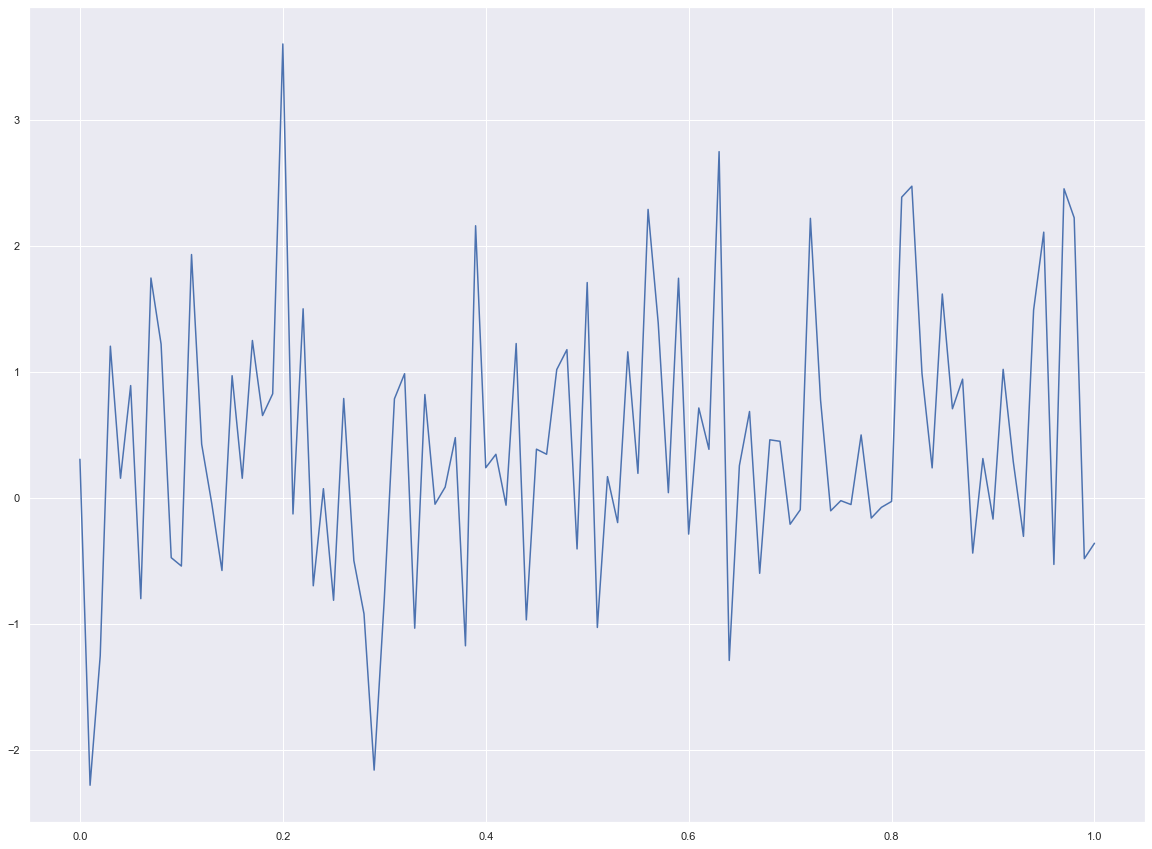

In [36]:
sns.lineplot(y=yk,x=x)

In [43]:
def linear(x,a,b):
    return list(map(lambda x:a*x+b,x))

def rational(x,a,b):
    return list(map(lambda x:a/(1+b*x),x))

def sum_squares(params, y, x, f):
    a = params[0]
    b = params[1]
    return sum((y - f(x, a, b))**2)

In [110]:
#a,b by brute-force (=exh) with linear aprox, to check number of itertions and function callings we will use fmin function
linearExh = opt.brute(sum_squares, ranges=[[0, 1], [0, 1]], args=(yk, x, linear), Ns=int(np.ceil(1/prec)), finish=lambda func, x0, args=(): opt.fmin(func, x0, args, full_output=True))
#a,b by gauss with linear aprox (contains in x prop)
linearGauss = opt.minimize(sum_squares, x0=[1, 1], args=(yk, x, linear), tol=prec, method='Powell')
#a,b by Nelder-Mead with linear aprox (contains in x prop)
linearNelderMead = opt.minimize(sum_squares, x0=[1, 1], args=(yk, x, linear), tol=prec, method='Nelder-Mead')

print("b-f: ",linearExh)
print("g: ",linearGauss.x)
print("n-m: ",linearNelderMead.x)

print("g: nit: ",linearGauss.nit,"   nfev: ",linearGauss.nfev)
print("n-m: ",linearNelderMead.nit,"   nfev: ",linearNelderMead.nfev)

Optimization terminated successfully.
         Current function value: 109.353974
         Iterations: 19
         Function evaluations: 37
b-f:  [0.6086672  0.11798353]
g:  [0.60864228 0.11798386]
n-m:  [0.60857996 0.11803121]
g: nit:  3    nfev:  91
n-m:  36    nfev:  69


<AxesSubplot:>

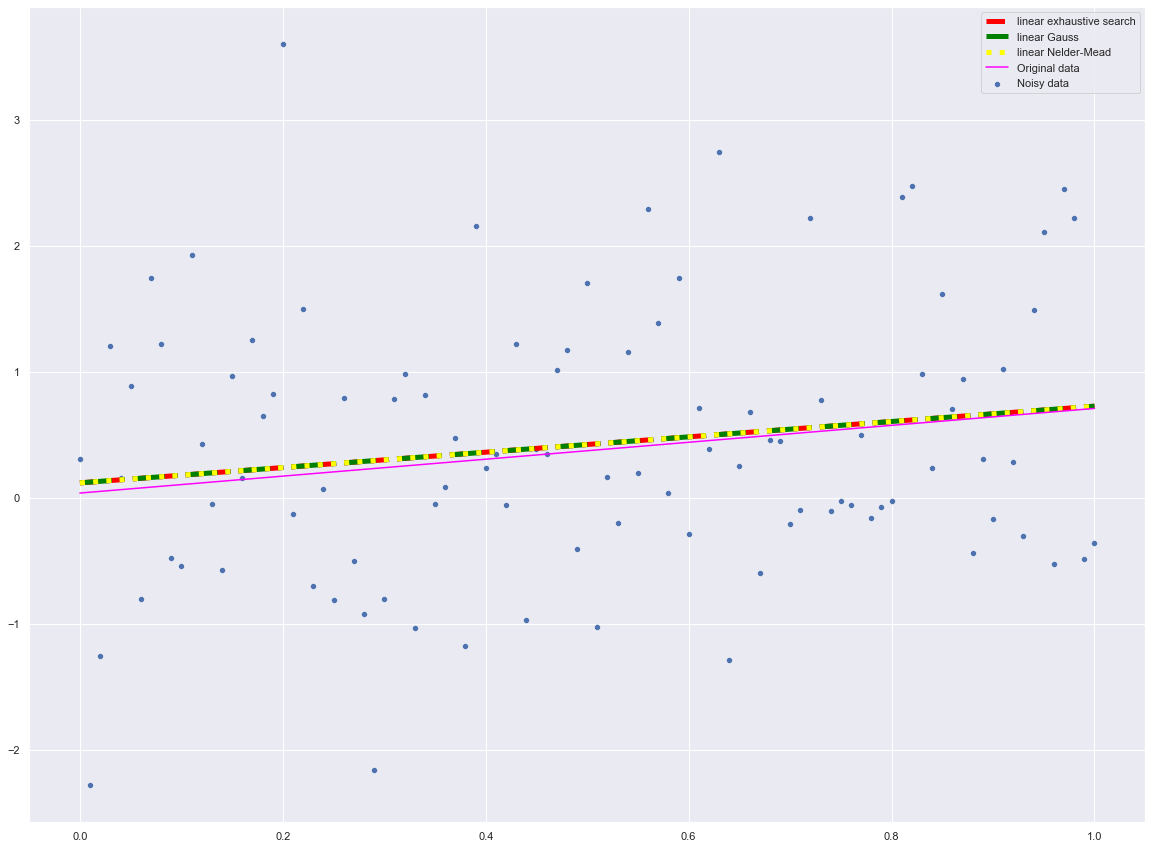

In [111]:
sns.scatterplot(y=yk,x=x,label="Noisy data")

#'-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
sns.lineplot(y=linear(x,*linearExh),x=x,ls="dashed", color="red",lw=5,label="linear exhaustive search")
sns.lineplot(y=linear(x,*linearGauss.x),x=x,ls="dashdot", color="green",lw=5,label="linear Gauss")
sns.lineplot(y=linear(x,*linearNelderMead.x),x=x,ls="dotted", color="yellow",lw=5,label="linear Nelder-Mead")

sns.lineplot(y=yk_original,x=x,color="fuchsia",label="Original data")

In [112]:
#a,b by brute-force (=exh) with rational aprox
rationalExh = opt.brute(sum_squares, ranges=[[0, 1], [0, 1]], args=(yk, x, rational), Ns=int(1/prec) + 1, finish=lambda func, x0, args=(): opt.fmin(func, x0, args, full_output=True))
#a,b by gauss with rational aprox (contains in x prop), init apr x0
rationalGauss = opt.minimize(sum_squares, x0=[1, 1], args=(yk, x, rational), tol=prec, method='Powell')
#a,b by Nelder-Mead with rational aprox (contains in x prop), init apr x0
rationalNelderMead = opt.minimize(sum_squares, x0=[1, 1], args=(yk, x, rational), tol=prec, method='Nelder-Mead')

print("b-f: ",rationalExh)
print("g: ",rationalGauss.x)
print("n-m: ",rationalNelderMead.x)

print("g: nit: ",rationalGauss.nit,"   nfev: ",rationalGauss.nfev)
print("n-m: ",rationalNelderMead.nit,"   nfev: ",rationalNelderMead.nfev)

Optimization terminated successfully.
         Current function value: 109.561019
         Iterations: 50
         Function evaluations: 93
b-f:  [ 0.24614467 -0.70588982]
g:  [ 0.24589348 -0.70690338]
n-m:  [ 0.24594827 -0.70652718]
g: nit:  5    nfev:  126
n-m:  39    nfev:  73


<AxesSubplot:>

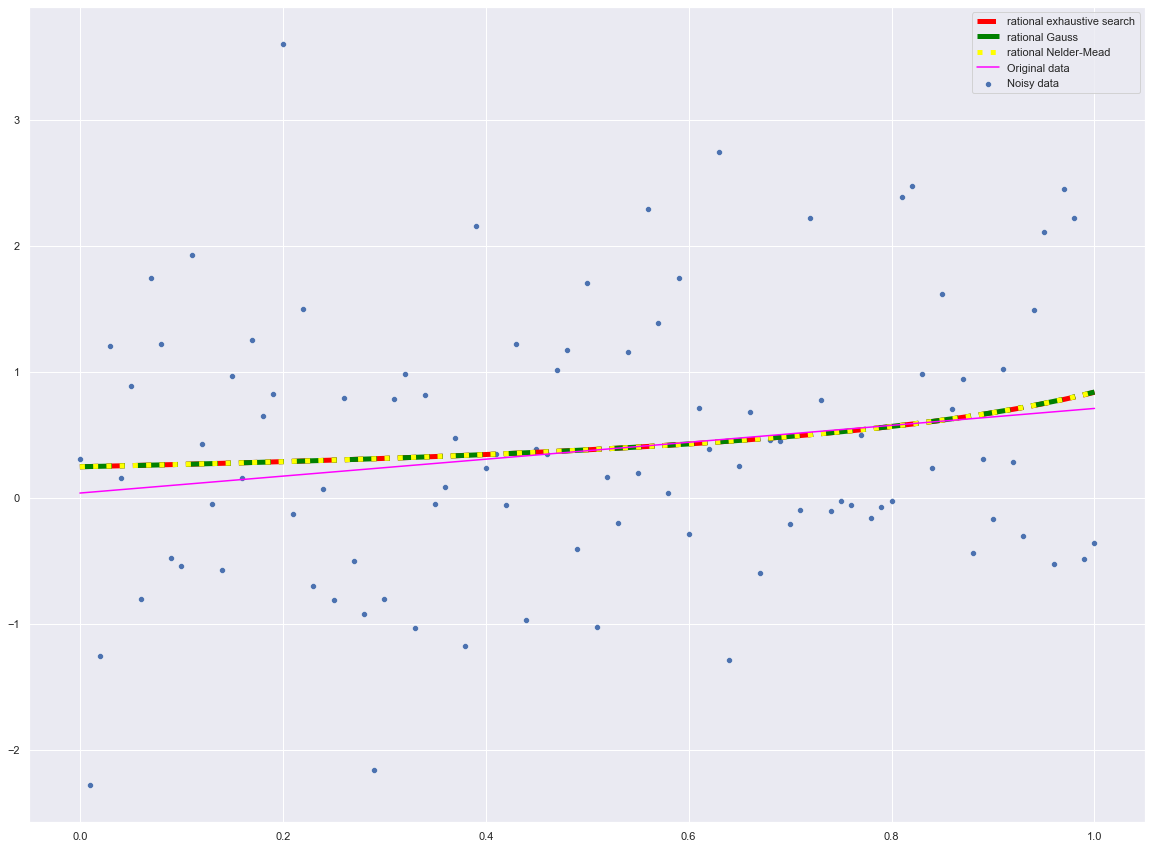

In [113]:
sns.scatterplot(y=yk,x=x,label="Noisy data")

#'-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
sns.lineplot(y=rational(x,*rationalExh),x=x,ls="dashed", color="red",lw=5,label="rational exhaustive search")
sns.lineplot(y=rational(x,*rationalGauss.x),x=x,ls="dashdot", color="green",lw=5,label="rational Gauss")
sns.lineplot(y=rational(x,*rationalNelderMead.x),x=x,ls="dotted", color="yellow",lw=5,label="rational Nelder-Mead")

sns.lineplot(y=yk_original,x=x,color="fuchsia",label="Original data")